In [87]:
import pandas as pd 
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns

## Loadind Data 
Loading the Pre Processed Data 
Train, Test and combined Raw Data 

In [88]:
Train = pd.read_csv("TrainData.csv",index_col=0)
Test = pd.read_csv("TestData.csv",index_col=0)
Raw = pd.read_csv("RawData.csv",index_col=0)
Train.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,GroupNo,TicketChar,TicketNumbers,TicketNumbers_Nor,Cabin_Charcter,Fare_Nor,AgeMean_Nor,AgeMedian_Nor,AgeNormal_Nor,GroupNo_Nor
1,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,2,A5,21171,0.006825,U,0.014151,0.271174,0.271174,0.271174,0.1
2,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,2,PC,17599,0.005674,C,0.139136,0.472229,0.472229,0.472229,0.1
3,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,1,STONO2,3101282,0.999989,U,0.015469,0.321438,0.321438,0.321438,0.0
4,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,2,U,113803,0.036694,C,0.103644,0.434531,0.434531,0.434531,0.1
5,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,1,U,373450,0.120416,U,0.015713,0.434531,0.434531,0.434531,0.0


Print the Column's Names 

In [89]:
columnNames = list(Train.head(0)) 
print(columnNames)

['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Sexb', 'Title', 'AgeMean', 'AgeMedian', 'AgeNormal', 'Isalone', 'GroupNo', 'TicketChar', 'TicketNumbers', 'TicketNumbers_Nor', 'Cabin_Charcter', 'Fare_Nor', 'AgeMean_Nor', 'AgeMedian_Nor', 'AgeNormal_Nor', 'GroupNo_Nor']


## Create dummy variables - Train 
Create dummy variables from all categorical variables 

In [90]:
cat_vars=['Pclass','Sex','Title','Cabin_Charcter','TicketChar','Embarked']
for var in cat_vars:
    cat_list='var'+'_'+var
    #Train Data 
    cat_list = pd.get_dummies(Train[var], prefix=var)
    Train1 = pd.concat([Train, cat_list] , axis=1)
    Train=Train1
   
cat_vars=['Pclass','Sex','Title','Cabin_Charcter','TicketChar','Embarked','Name','Ticket','Cabin','Age','Sexb','PassengerId']
data_vars=Train.columns.values.tolist()
to_keep=[i for i in data_vars if i not in cat_vars]
Train.shape

(891, 83)

In [91]:
Train=Train[to_keep]
Train.columns.values

array(['Survived', 'SibSp', 'Parch', 'Fare', 'AgeMean', 'AgeMedian',
       'AgeNormal', 'Isalone', 'GroupNo', 'TicketNumbers',
       'TicketNumbers_Nor', 'Fare_Nor', 'AgeMean_Nor', 'AgeMedian_Nor',
       'AgeNormal_Nor', 'GroupNo_Nor', 'Pclass_1', 'Pclass_2', 'Pclass_3',
       'Sex_female', 'Sex_male', 'Title_Army', 'Title_Dr.',
       'Title_Master', 'Title_Miss', 'Title_Mr.', 'Title_Mrs',
       'Title_Rev.', 'Cabin_Charcter_A', 'Cabin_Charcter_B',
       'Cabin_Charcter_C', 'Cabin_Charcter_D', 'Cabin_Charcter_E',
       'Cabin_Charcter_F', 'Cabin_Charcter_G', 'Cabin_Charcter_U',
       'TicketChar_A4', 'TicketChar_A5', 'TicketChar_AS', 'TicketChar_C',
       'TicketChar_CA', 'TicketChar_CASOTON', 'TicketChar_FC',
       'TicketChar_FCC', 'TicketChar_Fa', 'TicketChar_LINE',
       'TicketChar_PC', 'TicketChar_PP', 'TicketChar_PPP',
       'TicketChar_SC', 'TicketChar_SCA4', 'TicketChar_SCAH',
       'TicketChar_SCAHBasle', 'TicketChar_SCOW', 'TicketChar_SCPARIS',
       'TicketCh

## Create dummy variables - Test
Create dummy variables from all categorical variables

In [92]:
cat_vars=['Pclass','Sex','Title','Cabin_Charcter','TicketChar','Embarked']
for var in cat_vars:
    cat_list='var'+'_'+var
    #Test Data 
    cat_list = pd.get_dummies(Test[var], prefix=var)
    Test1 = pd.concat([Test, cat_list] , axis=1)
    Test=Test1
   
cat_vars=['Pclass','Sex','Title','Cabin_Charcter','TicketChar','Embarked','Name','Ticket','Cabin','Age','Sexb','PassengerId']
data_vars=Test.columns.values.tolist()
to_keep=[i for i in data_vars if i not in cat_vars]
FinalTest = Test
FinalTest.shape

(418, 71)

 ## Splitting the train set into train and test 

In [93]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

data_final_vars=Train.columns.values.tolist()
y=['y']
X = Train.loc[:, Train.columns != 'Survived']
y = np.ravel(Train.loc[:, Train.columns == 'Survived'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
columns = X_train.columns
X=[i for i in data_final_vars if i not in y]





## Recursive Feature Elimination (RFE)

In [94]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
rfe = RFE(logreg, 20)
rfe = rfe.fit(X_train, y_train.ravel())
print(rfe.support_)
print(rfe.ranking_)

[ True False False False False False False False False False False False
 False False False  True False  True  True  True False False  True False
  True False  True False False False False  True False  True  True False
  True False  True False False False False False False False False False
 False False False False False False False False False  True False  True
 False  True  True False  True  True  True False False False]
[ 1  8 36 16 20 17  7 33 40 44 39 35 37 38 26  1  5  1  1  1 24 32  1  6
  1  3  1 34 18  2 13  1  9  1  1 14  1 30  1 11 49 45 41 50 21 31 43 27
 47 48 25 29 46 10 42 15 51  1 22  1 28  1  1 12  1  1  1  4 23 19]


In [95]:
cols = X_train.columns.values[rfe.support_]
cols = (['Pclass_1','Sex_female',  'Title_Master' 
         , 'AgeMedian_Nor','GroupNo' ])  
         
        
#X=os_data_X[cols]
X = X_train[cols]
#y=os_data_y['y']
y = y_train
cols

['Pclass_1', 'Sex_female', 'Title_Master', 'AgeMedian_Nor', 'GroupNo']

In [96]:
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.437143
         Iterations 6
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.346     
Dependent Variable: y                AIC:              554.6807  
Date:               2019-04-12 17:31 BIC:              576.8535  
No. Observations:   623              Log-Likelihood:   -272.34   
Df Model:           4                LL-Null:          -416.19   
Df Residuals:       618              LLR p-value:      4.8588e-61
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     6.0000                                       
-----------------------------------------------------------------
                   Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
-----------------------------------------------------------------
Pclass_1           1.8771   0.2722  6.8956 0.0000  1.3435  2.4106
Sex_female         3.3018   0.2700 12.2286 0.0000  2.7726  3.8310


In [97]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [98]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.83


In [99]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[105   9]
 [ 23  50]]


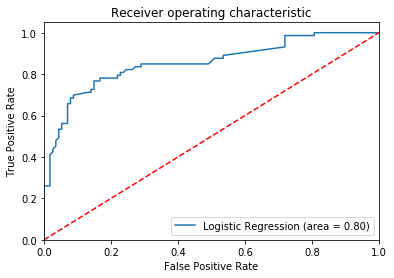

In [100]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [101]:
#cols = ([  'Sex_female',  'Title_Master',
#        'Title_Mrs', 'Cabin_Charcter_E', 'TicketChar_WC','AgeMedian','GroupNo' ])  
X_Test = FinalTest.loc[:,cols]
y_pred = logreg.predict(X_Test)
#Test['PassengerId']
df = pd.DataFrame({'PassengerId':Test['PassengerId'],'Survived':y_pred})
df.head()

,PassengerId,Survived
1,892,0
2,893,1
3,894,0
4,895,0
5,896,1


In [102]:
df.to_csv('lgr11.csv', index= False)